In [4]:
%config Completer.use_jedi = False

from utils import *
from parallel import to_run

import numpy as np
from matplotlib import pyplot as plt
import importlib
from multiprocessing import Pool
from tqdm.notebook import tqdm
import pickle

plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["figure.dpi"] = 72
plt.rcParams["figure.figsize"] = [12,8]

from ising_model import SimulateMH

In [4]:
pool = Pool(4)

In [5]:
with open("32x32-rangeT-rand.pkl","rb") as f:
    results_rand = pickle.load(f)
N=M=32

In [13]:
with open("dumps/32x32-rangeT-const.pkl","rb") as f:
    results_rand = pickle.load(f)

In [6]:
results = results_rand

In [4]:
scale = 200
times = 10

# Ts = np.concatenate([
#     np.linspace(0,1.8,scale),
#     np.linspace(1.8,3.5,5*scale),
#     np.linspace(3.5,6,scale),
# ])

Ts = np.linspace(0,4.5,scale*times).reshape((times, scale))

results = []
for Ts1 in tqdm(Ts):
    runs = len(Ts1)
    res = pool.starmap(to_run, 
            zip(*(np.arange(runs),
                      [1_000_000]*runs, # steps
                      Ts1, # temperature
                      [64]*runs, # lattice size
                      [64]*runs, # lattice size
                      [100]*runs, # frequency
                      np.random.randint(0,1000000, runs), # seed
                      [1]*runs, # bc
                    [False]*runs, # return_engine
                    ["random"]*runs # init
                      )),
            chunksize=10
        )
    results+= res

In [13]:
results[0][2].shape

(10000,)

In [11]:
len(results[])

4

In [ ]:
## len(results)

In [15]:
for i,(T,_,Ms, Es) in enumerate(results):
    if T > 3:
        break
print(i)

13333


In [16]:
steps_needed_normalized(T)*N*M/100

2056.052465756569

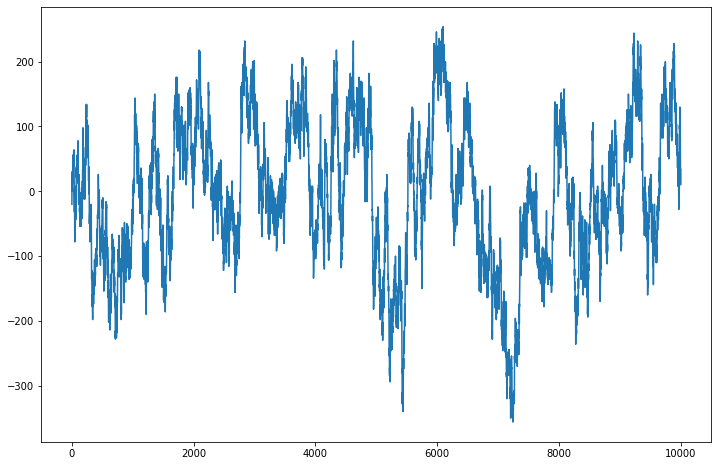

In [17]:
plt.plot(Ms)

In [22]:
meanMs = []
errMs = []
lastMs = []
Ts = []
freq = 100
for i,(T,_,Ms, Es) in enumerate(results):    
    mean, err = mean_with_err(Ms[-Ms.shape[0]//3:])
    meanMs.append(mean)
    lastMs.append(np.mean(Ms[-100:]))
    
    errMs.append(err)
    Ts.append(T)

In [23]:
with open("32x32-rangeMT-rand.pkl", "wb") as f:
    pickle.dump((Ts, meanMs), f)

In [19]:
meanMs_rand = meanMs

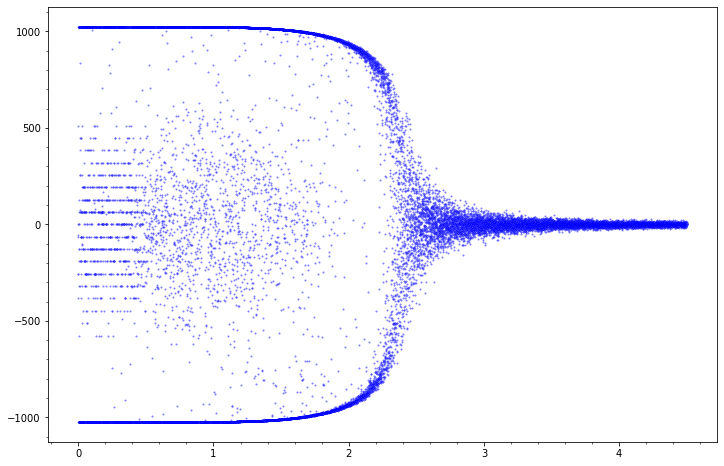

In [20]:
# plt.errorbar(Ts, np.abs(meanMs),yerr=errMs)
plt.scatter(Ts, (meanMs), s=1, marker="o", c="white", edgecolors="blue", alpha=0.5)
plt.minorticks_on()
# plt.grid(which="both")
# for t, m in zip(Ts, np.abs(meanMs)):
#     plt.gca().annotate(f'{t:0.2f}', (t,m))

In [10]:
2/2.44

0.819672131147541